In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import matplotlib.dates
from tqdm.notebook import tqdm
from IPython.display import display
pd.set_option('mode.chained_assignment', None)

In [68]:
filename = "log.txt"
df = pd.read_csv(filename, sep="|", header=None)

In [69]:
df.columns = ["time", "level", "file", "location", "contents"]

In [70]:
r = df.time.apply(lambda x: ":".join(x.split(":")[:-1]) + "." + x.split(":")[-1])

In [71]:
df.time = pd.to_datetime(r, errors="coerce")

In [72]:
cleaned_df = df[df.time.notnull()]

In [73]:
latency_df = cleaned_df[cleaned_df.contents.str.contains("Latency", na=False, regex=False)]

In [74]:
s = latency_df.contents.apply(lambda x: x.split(" ")[-1])
latency_df.contents = pd.to_numeric(s, errors="coerce")
latency_df = latency_df[latency_df.contents.notnull()]

In [75]:
latency_df.sort_values(by=["time"], inplace=True)

In [76]:
level_to_color = {
    "WARNING": (.5, 0., .5, 0.2), # warnings are purple
    "INFO": (0., .5, .5, 0.2),    # info is cyan
    "ERROR": (1., 0., 0., 0.5)    # errors are red
}

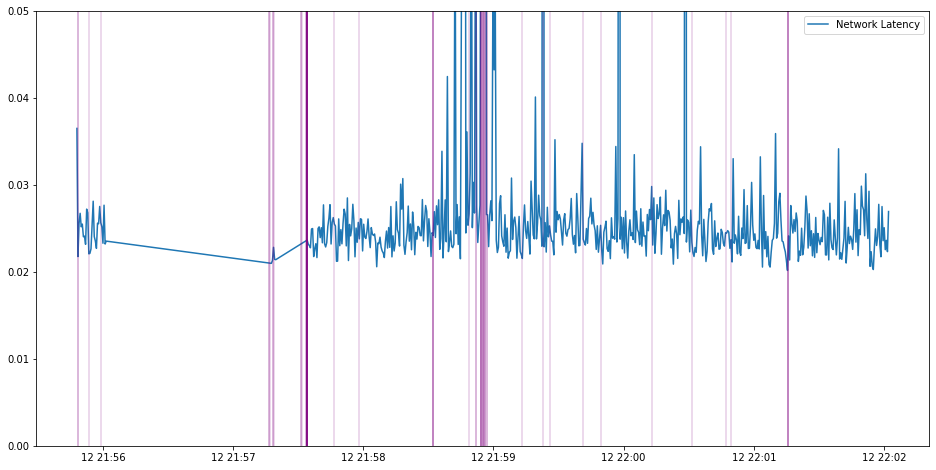

In [77]:
plt.figure(figsize=(16, 8))
plt.plot(latency_df.time, latency_df.contents, label="Network Latency")
bb = cleaned_df.sort_values(by=["time"])
bb = bb[~bb.contents.str.contains("Latency", regex=False, na=True)]
earliest_time = min(latency_df.time) 
latest_time = max(latency_df.time)
plt.ylim((0.0, 0.050))
for t, l in tqdm(zip(bb.time, bb.level)):
    if earliest_time <= t <= latest_time and l.strip() != "INFO":
        plt.axvline(t, color=level_to_color[l.strip()])
plt.legend(loc='best')
plt.show()

In [78]:
def time_in_range(start, end, x):
    """Return true if x is in the range [start, end]"""
    if start <= end:
        return (start <= x) & (x <= end)
    else:
        return (start <= x) | (x <= end)

In [79]:
a = latency_df[latency_df.contents.diff().abs() > 0.1]
windows = []
for j in range(1+(a.time.diff() >= datetime.timedelta(seconds=1)).cumsum().max()):
    windows.append(a[(a.time.diff() >= datetime.timedelta(seconds=1)).cumsum() == j])
for j in range(len(windows)):
    windows[j] = latency_df[time_in_range(windows[j].time.iloc[0] - datetime.timedelta(seconds=1),
                                          windows[j].time.iloc[-1] + datetime.timedelta(seconds=1),
                                          latency_df.time)]

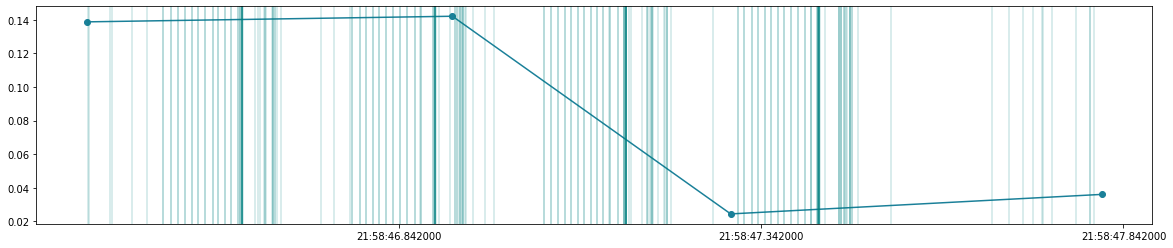

,time,level,file,location,contents
1602,2020-05-12 21:58:46.413,INFO,video.c,ReceiveVideo:706,"NACK for Video ID 1441, Index 10 Received! Bu..."
1603,2020-05-12 21:58:46.415,INFO,video.c,RenderScreen:226,Late! Rendering ID 1442 (Age 0.031652) (Packe...
1604,2020-05-12 21:58:46.444,INFO,video.c,RenderScreen:226,Late! Rendering ID 1443 (Age 0.043244) (Packe...
1605,2020-05-12 21:58:46.446,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...
1606,2020-05-12 21:58:46.474,INFO,video.c,RenderScreen:226,Late! Rendering ID 1444 (Age 0.027657) (Packe...
1607,2020-05-12 21:58:46.495,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...
1608,2020-05-12 21:58:46.517,INFO,video.c,updateVideo:621,************NACKING VIDEO PACKET 1445 15 (/28...
1609,2020-05-12 21:58:46.517,INFO,video.c,nack:126,"Missing Video Packet ID 1445 Index 15, NACKin..."
1610,2020-05-12 21:58:46.527,INFO,video.c,updateVideo:621,************NACKING VIDEO PACKET 1445 16 (/28...
1611,2020-05-12 21:58:46.527,INFO,video.c,nack:126,"Missing Video Packet ID 1445 Index 16, NACKin..."


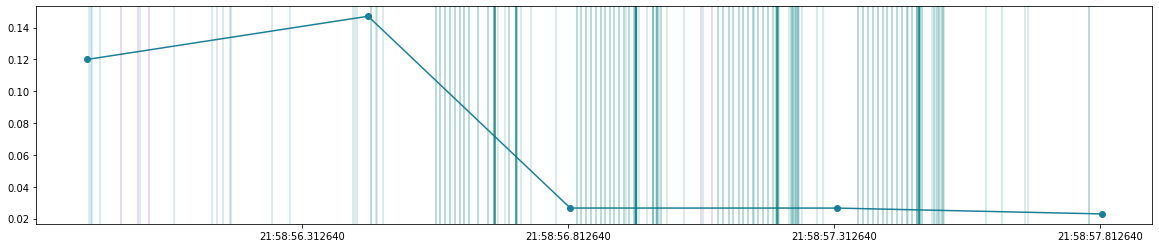

,time,level,file,location,contents
2389,2020-05-12 21:58:55.911,INFO,audio.c,updateAudio:135,Done catching up! Audio Queue: 28240
2390,2020-05-12 21:58:55.916,INFO,video.c,updateVideo:598,Skip this render
2391,2020-05-12 21:58:55.918,INFO,video.c,RenderScreen:226,Late! Rendering ID 1649 (Age 0.030412) (Packe...
2392,2020-05-12 21:58:55.932,INFO,video.c,RenderScreen:226,Late! Rendering ID 1650 (Age 0.038453) (Packe...
2393,2020-05-12 21:58:55.971,WARNING,audio.c,updateAudio:174,"Audio queue full, skipping ID 3416 (Queued: 6..."
2394,2020-05-12 21:58:56.004,WARNING,audio.c,updateAudio:174,"Audio queue full, skipping ID 3417 (Queued: 4..."
2395,2020-05-12 21:58:56.007,INFO,video.c,RenderScreen:226,Late! Rendering ID 1652 (Age 0.027096) (Packe...
2396,2020-05-12 21:58:56.025,WARNING,audio.c,updateAudio:174,"Audio queue full, skipping ID 3418 (Queued: 3..."
2397,2020-05-12 21:58:56.072,INFO,audio.c,updateAudio:126,Audio Queue too low: 10998. Needs to catch up!
2398,2020-05-12 21:58:56.142,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...


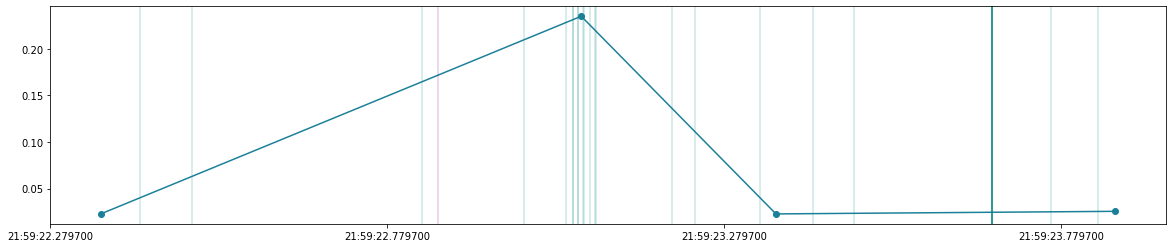

,time,level,file,location,contents
3162,2020-05-12 21:59:22.413,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...
3163,2020-05-12 21:59:22.490,INFO,video.c,RenderScreen:226,Late! Rendering ID 2176 (Age 0.028051) (Packe...
3164,2020-05-12 21:59:22.832,INFO,main.c,update:212,Ping! 219
3165,2020-05-12 21:59:22.856,WARNING,network.c,ReadUDPPacket:358,Unexpected Packet Error: 997
3166,2020-05-12 21:59:22.983,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...
3167,2020-05-12 21:59:23.045,INFO,main.c,update:212,Ping! 219
3169,2020-05-12 21:59:23.055,INFO,video.c,nack:126,"Missing Video Packet ID 2189 Index 5, NACKing..."
3168,2020-05-12 21:59:23.055,INFO,video.c,updateVideo:621,************NACKING VIDEO PACKET 2189 5 (/35)...
3170,2020-05-12 21:59:23.063,INFO,video.c,updateVideo:621,************NACKING VIDEO PACKET 2189 6 (/35)...
3171,2020-05-12 21:59:23.063,INFO,video.c,nack:126,"Missing Video Packet ID 2189 Index 6, NACKing..."


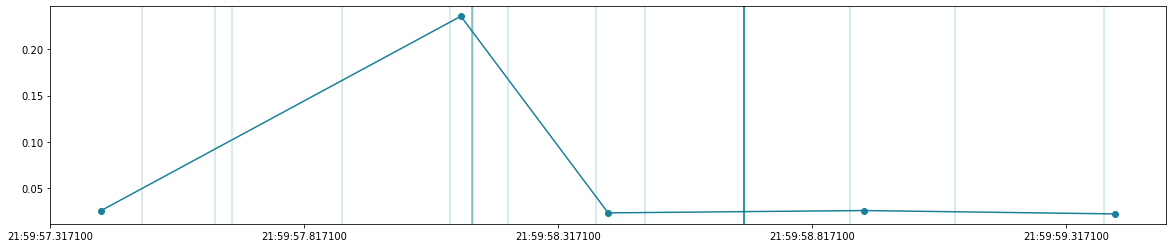

,time,level,file,location,contents
3591,2020-05-12 21:59:57.498,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...
3592,2020-05-12 21:59:57.641,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...
3593,2020-05-12 21:59:57.675,INFO,video.c,RenderScreen:226,Late! Rendering ID 2981 (Age 0.033576) (Packe...
3594,2020-05-12 21:59:57.891,INFO,main.c,update:212,Ping! 289
3595,2020-05-12 21:59:58.104,INFO,main.c,update:212,Ping! 289
3597,2020-05-12 21:59:58.148,INFO,video.c,updateVideo:497,MBPS: 25208483.840444 0.333289
3598,2020-05-12 21:59:58.148,INFO,video.c,updateVideo:529,MBPS2: 25838695.936455
3599,2020-05-12 21:59:58.148,INFO,video.c,updateVideo:535,MBPS3: 25750000
3600,2020-05-12 21:59:58.149,INFO,main.c,update:161,Asking for server MBPS to be 24.557114
3601,2020-05-12 21:59:58.218,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...


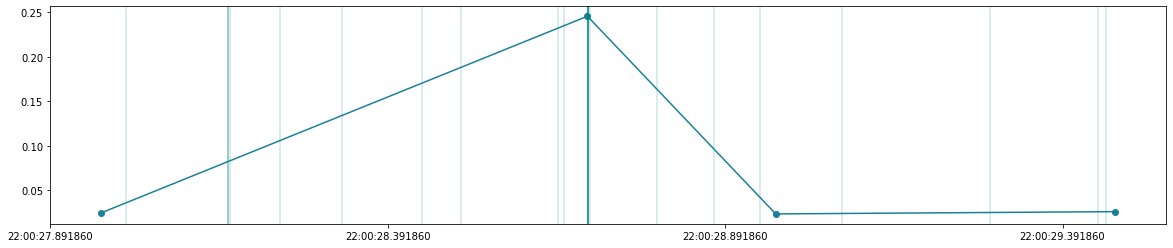

,time,level,file,location,contents
3991,2020-05-12 22:00:28.005,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...
3992,2020-05-12 22:00:28.156,INFO,video.c,updateVideo:497,MBPS: 31457280.000000 0.333321
3993,2020-05-12 22:00:28.156,INFO,video.c,updateVideo:529,MBPS2: 31457280.000000
3994,2020-05-12 22:00:28.156,INFO,video.c,updateVideo:535,MBPS3: 31250000
3995,2020-05-12 22:00:28.158,INFO,main.c,update:161,Asking for server MBPS to be 29.802322
3996,2020-05-12 22:00:28.233,INFO,video.c,RenderScreen:226,Late! Rendering ID 3660 (Age 0.026341) (Packe...
3997,2020-05-12 22:00:28.325,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...
3998,2020-05-12 22:00:28.443,INFO,main.c,update:212,Ping! 350
3999,2020-05-12 22:00:28.500,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...
4000,2020-05-12 22:00:28.645,INFO,main.c,ReceivePackets:369,Took more than 20ms to receive something!! To...


In [81]:
for window in windows:
    in_window = time_in_range(window.time.iloc[0], window.time.iloc[-1], cleaned_df.time)
    b = cleaned_df[in_window].sort_values(by=["time"])
    b = b[~b.contents.str.contains("Latency", regex=False, na=True)]
    in_window = time_in_range(window.time.iloc[0], window.time.iloc[-1], latency_df.time)
    plt.figure(figsize=(20, 4))
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M:%S.%f"))
    plt.plot(latency_df[in_window].time, latency_df[in_window].contents, 'o-', color=(0.1, 0.5, 0.6))
    for t, l in zip(b.time, b.level):
        plt.axvline(t, color=level_to_color[l.strip()])
    plt.show()
    display(b)